# Exploratory Data Analysis

### Notebook Index
- [Importing the Data](#Importing)
- [Exploratory Data Analysis](#EDA)
- [Visualization](#VS)
- [Feature Engineering](#FE)
- [Visualizing the Final Dataframe](#VIS)

---------

## Importing Libraries:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import re

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

-------
<a class="anchor" id="Importing"></a>
## Importing the SEC filings for Apple, Inc.

In [3]:
company_name = 'Apple'

In [4]:
df = pd.read_csv(f'data/{company_name}_SEC.csv')

In [5]:
df.head()

,date,document_type,description,file_number
0,1994-01-26,424B5,Prospectus [Rule 424(b)(5)]Acc-no: 0000891618-...,033-6231094502696
1,1994-01-26,10-Q,Quarterly report [Sections 13 or 15(d)]Acc-no:...,000-1003094502732
2,1994-02-10,SC 13G/A,[Amend] Statement of acquisition of beneficial...,005-3363294505635
3,1994-02-17,SC 13G/A,[Amend] Statement of acquisition of beneficial...,005-3363294510471
4,1994-02-18,SC 13G,Statement of acquisition of beneficial ownersh...,005-3363200000000


-----

<a class="anchor" id="EDA"></a>

# Exploratory Data Analysis

### Inspecting the Data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 4 columns):
date             585 non-null object
document_type    585 non-null object
description      585 non-null object
file_number      533 non-null object
dtypes: object(4)
memory usage: 18.4+ KB


In [7]:
df.describe()

,date,document_type,description,file_number
count,585,585,585,533
unique,509,37,585,533
top,2005-02-14,8-K,"Current report, items 5.03 and 9.01\nAcc-no: 0...",000-10030626787
freq,4,164,1,1


-------

### Converting the Date Type into Date Time:

In [8]:
df['date'] = pd.to_datetime(df.date, dayfirst=True)
# df.set_index('Date', inplace=True)
# df.sort_index(inplace=True, ascending=True)
df.head(2)

,date,document_type,description,file_number
0,1994-01-26,424B5,Prospectus [Rule 424(b)(5)]Acc-no: 0000891618-...,033-6231094502696
1,1994-01-26,10-Q,Quarterly report [Sections 13 or 15(d)]Acc-no:...,000-1003094502732


-------

### Inspecting Missing Values:

- File Serial-Number Missing: 52

In [9]:
df.isnull().sum()

date              0
document_type     0
description       0
file_number      52
dtype: int64

### Displaying the Missing Values:

In [10]:
df[df['file_number'].isnull().sort_values(ascending=False)].head(3)

/Users/adamdelreal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date,document_type,description,file_number
11,1995-01-10,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
13,1995-02-07,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
23,1995-11-13,SC 13D/A,[Amend] General statement of acquisition of be...,NaN


### Dropping the File Number & Description:

In [11]:
df.drop('file_number', axis=1, inplace=True)

In [12]:
df.drop('description', axis=1, inplace=True)

In [13]:
df.head(2)

,date,document_type
0,1994-01-26,424B5
1,1994-01-26,10-Q


------
<a class="anchor" id="VS"></a>

# Visualization:

### Plotting Document Types:

In [14]:
def count_plot(df, column):
    """ 
    Returns a graph with the count frequency of each document. 
    
    Parameters
    -----------
    df : var
        Passes the variable assigned to a dataframe.
    
    column : str
        Passes the string assigned to a column.
    """
    temp_df = df.copy()
    # Sets a dark background
    sns.set_style("darkgrid")
    # Setting up the size of the plot
    plt.figure(figsize=(14,7))
    # Instantiating the count plot from the Seaborn library
    sns.countplot(x=column, data=temp_df)
    # Setting up the x and y labels
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Document Type', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.title('SEC Document Filings', fontsize=18)

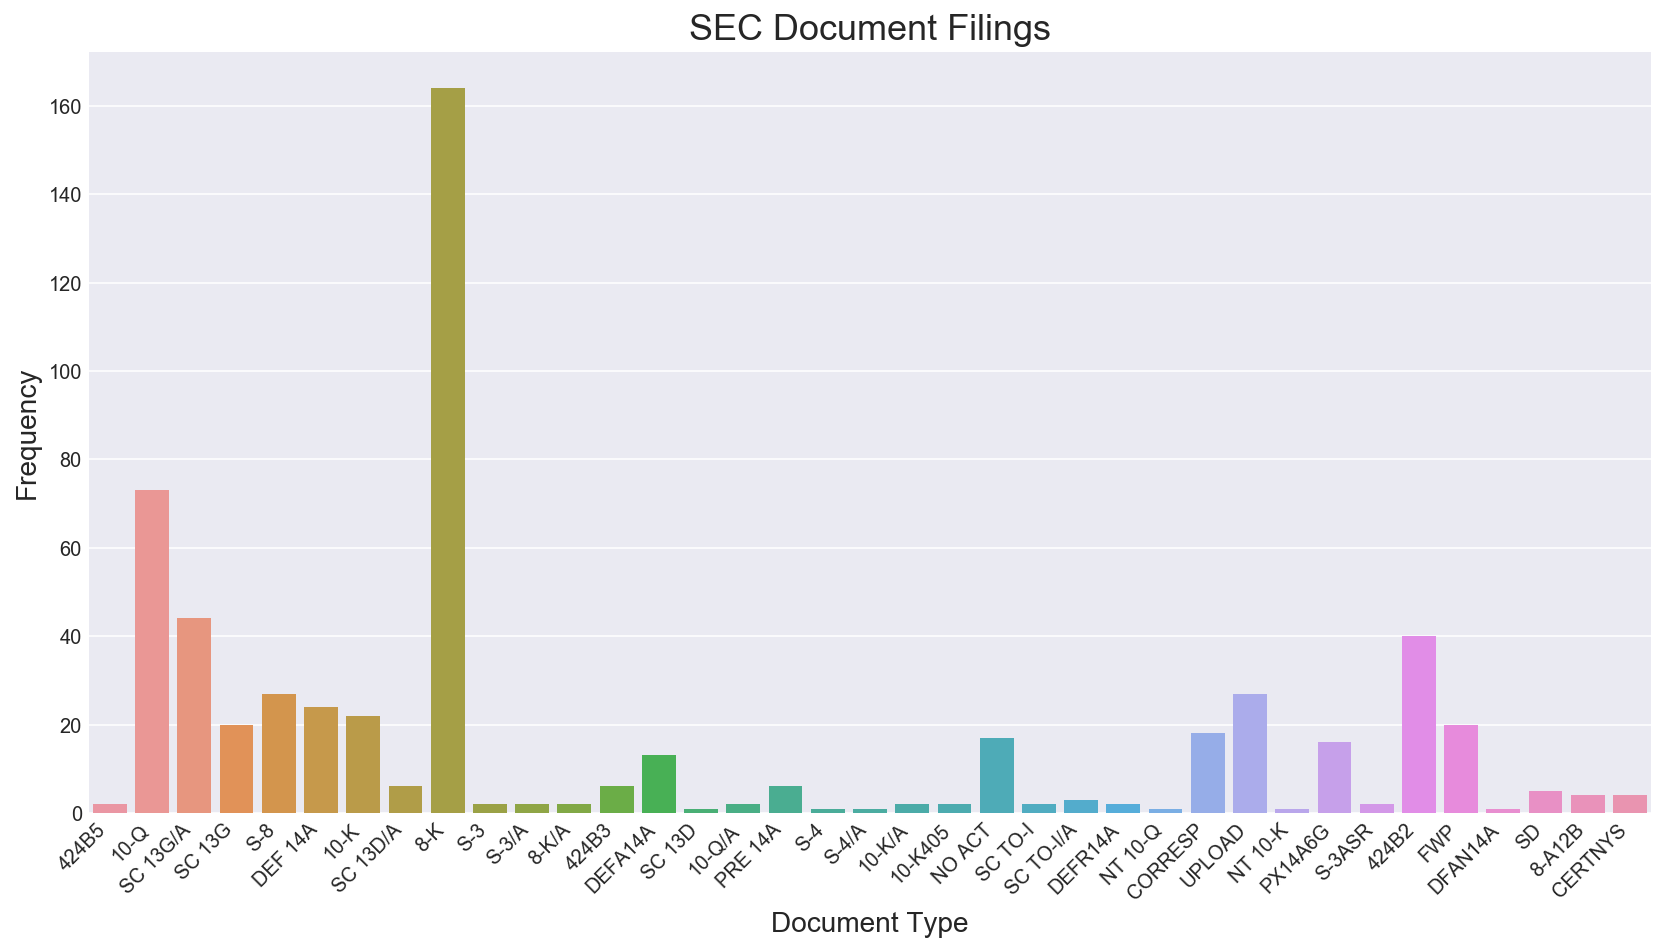

In [15]:
count_plot(df ,'document_type')

-------
<a class="anchor" id="FE"></a>

# Feature Engineering

### Inspecting the Document Types:

The Following Documents are practically the same therefore, grouping the documents would be a good approach.
- 10-Q and 10-Q/A 
- SC 13G/A and SC 13G
- 8-K and 8-K/A
- S-3 and S-3/A
- 10-K and 10-K/A
- S-4 and S-4/A

In [23]:
df.document_type.value_counts().head()

8-K       166
10-Q       75
SC 13G     64
424B2      40
UPLOAD     27
Name: document_type, dtype: int64

### Grouping the Redundant Document Types:
Replacing the Annual (`/A`) symbol in order to group the documents.

In [17]:
df.document_type = df.document_type.map(lambda x: x.replace('/A', ''))

### One-Hot Encoding the Document Types:
Turning the categorical data into binary for each filing so, a classification model can be performed.

In [22]:
# Setting up the dummy variables
dummy = pd.get_dummies(df.document_type)
# Merging the dummy variables onto the original dataframe
df = pd.concat([df, dummy], axis=1)
# Taking a look at the data
df.head(3)

,date,document_type,10-K,10-K405,10-Q,424B2,424B3,424B5,8-A12B,8-K,...,PX14A6G,S-3,S-3ASR,S-4,S-8,SC 13D,SC 13G,SC TO-I,SD,UPLOAD
0,1994-01-26,424B5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1994-01-26,10-Q,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1994-02-10,SC 13G,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


-------
<a class="anchor" id="VIS"></a>

# Visualizing the Final Dataframe:

### Plotting the Final Values for Document Types:

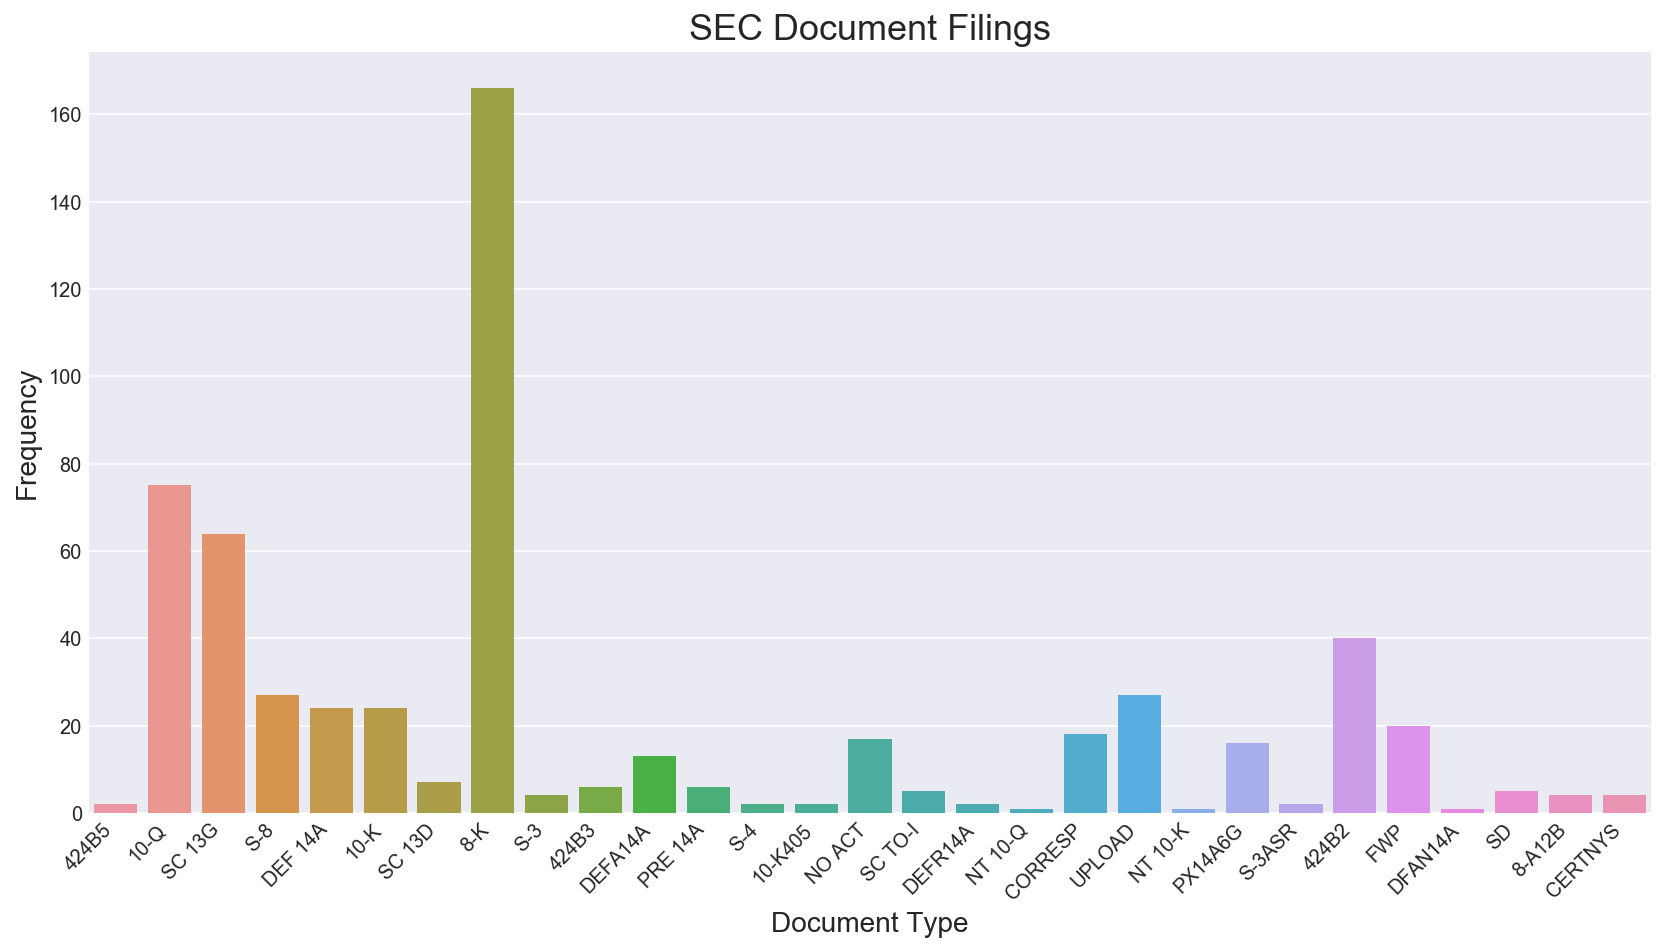

In [19]:
count_plot(df ,'document_type')

---------

## Saving onto a CSV:

In [20]:
# df.to_csv(f'data/{company_name}_SEC_clean.csv', index=False)